<a href="https://colab.research.google.com/github/crislmfroes/tensorflow-colab/blob/master/overfitting_e_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [0]:
N_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=N_WORDS)

In [0]:
def multi_hot_sequences(sequences, dimension):
  results = np.zeros((len(sequences), dimension))
  for i, word_indices in enumerate(sequences):
    results[i, word_indices] = 1.0
  return results

In [0]:
train_data = multi_hot_sequences(train_data, dimension=N_WORDS)
test_data = multi_hot_sequences(test_data, dimension=N_WORDS)

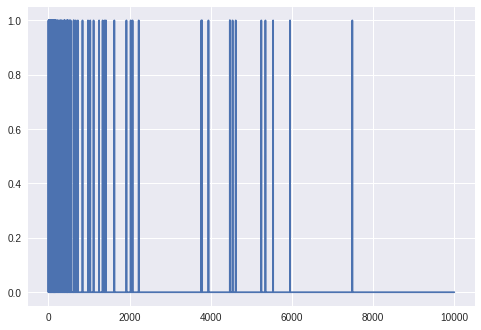

In [30]:
plt.plot(train_data[0])

In [31]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(N_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [32]:
baseline_history = baseline_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.4812 - acc: 0.8002 - binary_crossentropy: 0.4812 - val_loss: 0.3279 - val_acc: 0.8787 - val_binary_crossentropy: 0.3279
Epoch 2/20
 - 5s - loss: 0.2391 - acc: 0.9152 - binary_crossentropy: 0.2391 - val_loss: 0.2810 - val_acc: 0.8880 - val_binary_crossentropy: 0.2810
Epoch 3/20
 - 5s - loss: 0.1764 - acc: 0.9389 - binary_crossentropy: 0.1764 - val_loss: 0.2931 - val_acc: 0.8844 - val_binary_crossentropy: 0.2931
Epoch 4/20
 - 5s - loss: 0.1400 - acc: 0.9536 - binary_crossentropy: 0.1400 - val_loss: 0.3161 - val_acc: 0.8780 - val_binary_crossentropy: 0.3161
Epoch 5/20
 - 5s - loss: 0.1124 - acc: 0.9648 - binary_crossentropy: 0.1124 - val_loss: 0.3575 - val_acc: 0.8693 - val_binary_crossentropy: 0.3575
Epoch 6/20
 - 5s - loss: 0.0905 - acc: 0.9728 - binary_crossentropy: 0.0905 - val_loss: 0.3875 - val_acc: 0.8681 - val_binary_crossentropy: 0.3875
Epoch 7/20
 - 5s - loss: 0.0710 - acc: 0.9812 - binary_crossentropy:

In [33]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(N_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [34]:
smaller_history = smaller_model.fit(train_data, train_labels, batch_size=512, epochs=20, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5556 - acc: 0.7706 - binary_crossentropy: 0.5556 - val_loss: 0.4393 - val_acc: 0.8598 - val_binary_crossentropy: 0.4393
Epoch 2/20
 - 5s - loss: 0.3429 - acc: 0.8989 - binary_crossentropy: 0.3429 - val_loss: 0.3314 - val_acc: 0.8824 - val_binary_crossentropy: 0.3314
Epoch 3/20
 - 5s - loss: 0.2501 - acc: 0.9246 - binary_crossentropy: 0.2501 - val_loss: 0.2976 - val_acc: 0.8863 - val_binary_crossentropy: 0.2976
Epoch 4/20
 - 5s - loss: 0.2016 - acc: 0.9386 - binary_crossentropy: 0.2016 - val_loss: 0.2887 - val_acc: 0.8864 - val_binary_crossentropy: 0.2887
Epoch 5/20
 - 5s - loss: 0.1694 - acc: 0.9478 - binary_crossentropy: 0.1694 - val_loss: 0.2892 - val_acc: 0.8841 - val_binary_crossentropy: 0.2892
Epoch 6/20
 - 5s - loss: 0.1466 - acc: 0.9569 - binary_crossentropy: 0.1466 - val_loss: 0.2964 - val_acc: 0.8822 - val_binary_crossentropy: 0.2964
Epoch 7/20
 - 5s - loss: 0.1274 - acc: 0.9644 - binary_crossentropy:

In [35]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(N_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [36]:
bigger_history = bigger_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.3574 - acc: 0.8436 - binary_crossentropy: 0.3574 - val_loss: 0.3339 - val_acc: 0.8632 - val_binary_crossentropy: 0.3339
Epoch 2/20
 - 5s - loss: 0.1514 - acc: 0.9446 - binary_crossentropy: 0.1514 - val_loss: 0.3489 - val_acc: 0.8674 - val_binary_crossentropy: 0.3489
Epoch 3/20
 - 5s - loss: 0.0561 - acc: 0.9824 - binary_crossentropy: 0.0561 - val_loss: 0.4493 - val_acc: 0.8667 - val_binary_crossentropy: 0.4493
Epoch 4/20
 - 5s - loss: 0.0085 - acc: 0.9990 - binary_crossentropy: 0.0085 - val_loss: 0.5719 - val_acc: 0.8699 - val_binary_crossentropy: 0.5719
Epoch 5/20
 - 5s - loss: 0.0013 - acc: 0.9999 - binary_crossentropy: 0.0013 - val_loss: 0.6467 - val_acc: 0.8710 - val_binary_crossentropy: 0.6467
Epoch 6/20
 - 5s - loss: 3.1204e-04 - acc: 1.0000 - binary_crossentropy: 3.1204e-04 - val_loss: 0.6916 - val_acc: 0.8714 - val_binary_crossentropy: 0.6916
Epoch 7/20
 - 5s - loss: 1.8018e-04 - acc: 1.0000 - binary_c

In [0]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16, 10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_' + key], '--', label=name.title() + ' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title() + ' Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])

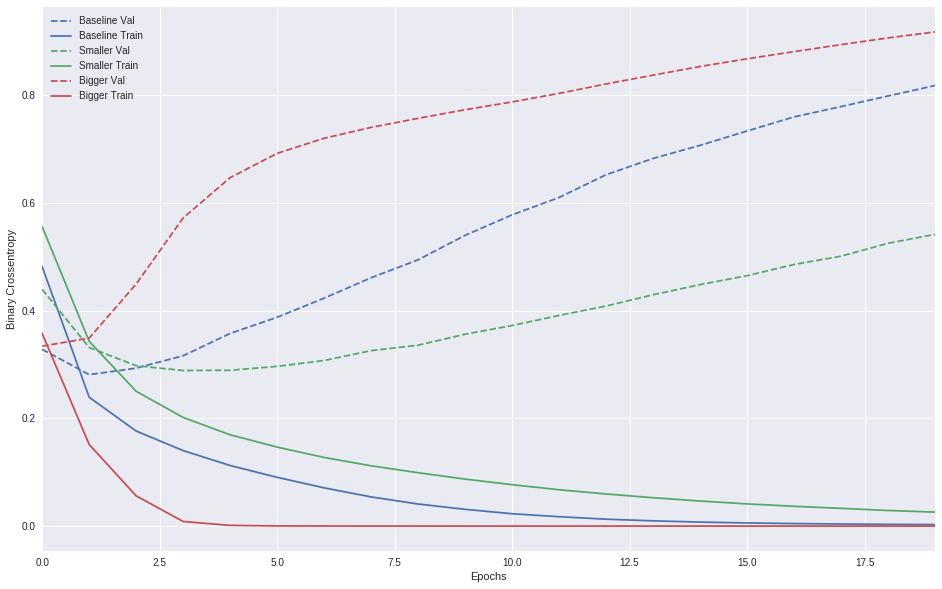

In [38]:
plot_history([('baseline', baseline_history), ('smaller', smaller_history), ('bigger', bigger_history)])

In [39]:
l2_model = keras.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu, input_shape=(N_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

l2_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_25 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [40]:
l2_history = l2_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5376 - acc: 0.8012 - binary_crossentropy: 0.4976 - val_loss: 0.3827 - val_acc: 0.8729 - val_binary_crossentropy: 0.3403
Epoch 2/20
 - 4s - loss: 0.3052 - acc: 0.9062 - binary_crossentropy: 0.2580 - val_loss: 0.3338 - val_acc: 0.8884 - val_binary_crossentropy: 0.2834
Epoch 3/20
 - 4s - loss: 0.2522 - acc: 0.9292 - binary_crossentropy: 0.1994 - val_loss: 0.3390 - val_acc: 0.8865 - val_binary_crossentropy: 0.2845
Epoch 4/20
 - 4s - loss: 0.2268 - acc: 0.9417 - binary_crossentropy: 0.1707 - val_loss: 0.3516 - val_acc: 0.8815 - val_binary_crossentropy: 0.2943
Epoch 5/20
 - 4s - loss: 0.2114 - acc: 0.9482 - binary_crossentropy: 0.1530 - val_loss: 0.3693 - val_acc: 0.8773 - val_binary_crossentropy: 0.3100
Epoch 6/20
 - 4s - loss: 0.2002 - acc: 0.9536 - binary_crossentropy: 0.1400 - val_loss: 0.3835 - val_acc: 0.8747 - val_binary_crossentropy: 0.3226
Epoch 7/20
 - 4s - loss: 0.1931 - acc: 0.9551 - binary_crossentropy:

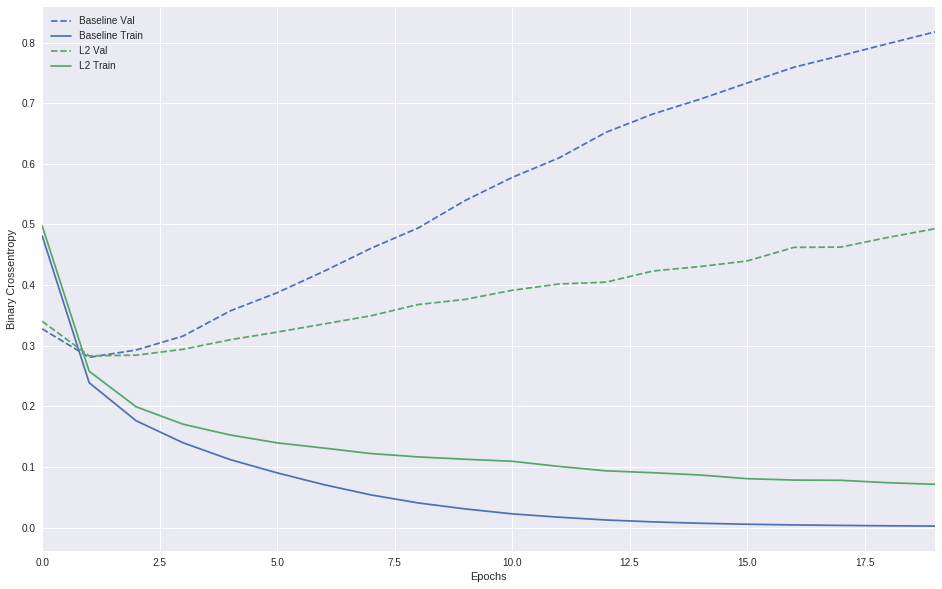

In [41]:
plot_history([('baseline', baseline_history), ('l2', l2_history)])

In [43]:
dropout_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(N_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dropout_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

dropout_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [44]:
dropout_history = dropout_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6225 - acc: 0.6553 - binary_crossentropy: 0.6225 - val_loss: 0.4940 - val_acc: 0.8512 - val_binary_crossentropy: 0.4940
Epoch 2/20
 - 4s - loss: 0.4621 - acc: 0.8129 - binary_crossentropy: 0.4621 - val_loss: 0.3529 - val_acc: 0.8804 - val_binary_crossentropy: 0.3529
Epoch 3/20
 - 4s - loss: 0.3581 - acc: 0.8744 - binary_crossentropy: 0.3581 - val_loss: 0.2965 - val_acc: 0.8881 - val_binary_crossentropy: 0.2965
Epoch 4/20
 - 4s - loss: 0.2925 - acc: 0.9032 - binary_crossentropy: 0.2925 - val_loss: 0.2832 - val_acc: 0.8884 - val_binary_crossentropy: 0.2832
Epoch 5/20
 - 4s - loss: 0.2479 - acc: 0.9225 - binary_crossentropy: 0.2479 - val_loss: 0.2797 - val_acc: 0.8881 - val_binary_crossentropy: 0.2797
Epoch 6/20
 - 4s - loss: 0.2115 - acc: 0.9342 - binary_crossentropy: 0.2115 - val_loss: 0.2875 - val_acc: 0.8846 - val_binary_crossentropy: 0.2875
Epoch 7/20
 - 4s - loss: 0.1847 - acc: 0.9415 - binary_crossentropy:

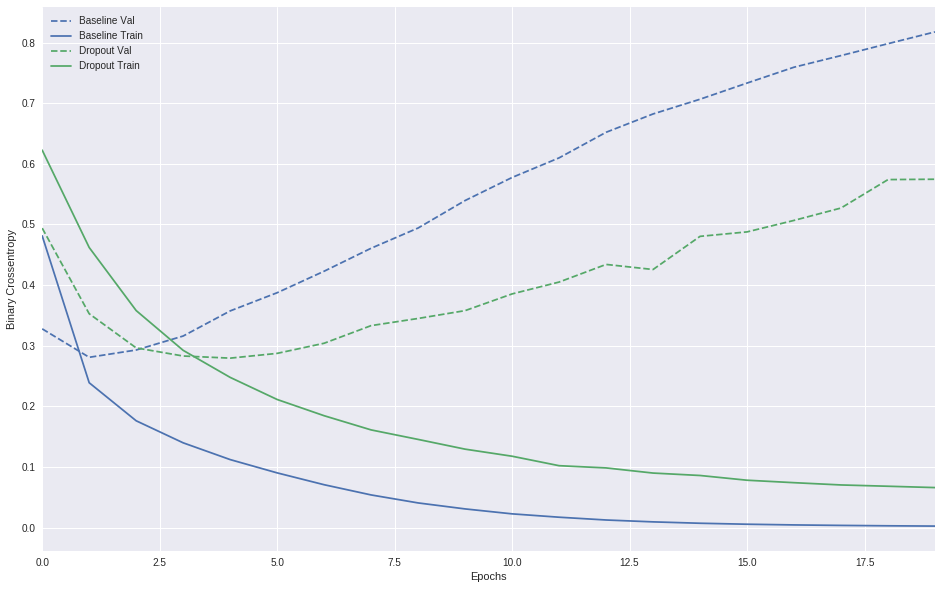

In [45]:
plot_history([('baseline', baseline_history), ('dropout', dropout_history)])

In [0]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.